# New Section


The Titanic dataset from the seaborn library contains information about the passengers aboard the Titanic, categorized into various features such as survival status, passenger class, gender, age, family relationships, fare, and embarkation details. It serves as a classic example for exploratory data analysis and machine learning, often used to predict survival outcomes based on socio-economic and demographic factors. The dataset includes both numerical and categorical variables, with some missing values in features like age and deck. Its diverse attributes make it suitable for visualizing relationships, handling missing data, and performing classification tasks.

survived (int):
Indicates whether the passenger survived (1) or not (0).

pclass (int):
Passenger class (1 = First class, 2 = Second class, 3 = Third class). It reflects the socio-economic status of the passengers.

sex (str):
Gender of the passenger (male or female).

age (float):
Age of the passenger. Some values may be missing (NaN).

sibsp (int):
Number of siblings or spouses aboard the Titanic.

parch (int):
Number of parents or children aboard the Titanic.

fare (float):
The ticket fare paid by the passenger.

embarked (str):
Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

class (category):
The passenger class (First, Second, Third) represented as a categorical variable. It's derived from pclass.

who (str):
A simplified representation of gender and age group (man, woman, child).

adult_male (bool):
Whether the passenger is an adult male (True or False).

deck (category):
The deck on which the passenger stayed. Many values are missing (NaN).

embark_town (str):
Name of the town where the passenger embarked (Cherbourg, Queenstown, Southampton).

alive (str):
Whether the passenger survived ("yes" or "no").

alone (bool):
Whether the passenger was traveling alone (True or False).

- **Problem statement:-**
The Titanic dataset is a famous collection of data about passengers aboard the RMS Titanic. The goal is to predict whether a passenger survived based on features like age, sex, and ticket class

## **1.Understanding the data**

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Titanic dataset
df = sns.load_dataset('titanic')


In [56]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [57]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2.Data cleaning

In [58]:
null=df.isnull().sum()
print(null[null>0])

age            177
embarked         2
deck           688
embark_town      2
dtype: int64


In [59]:
# droping high number missing values column
df.drop("deck",axis=1,inplace=True)



#  Drop rows with missing 'embarked' values
df.dropna(subset=['embark_town'], inplace=True)

<Axes: xlabel='age', ylabel='Count'>

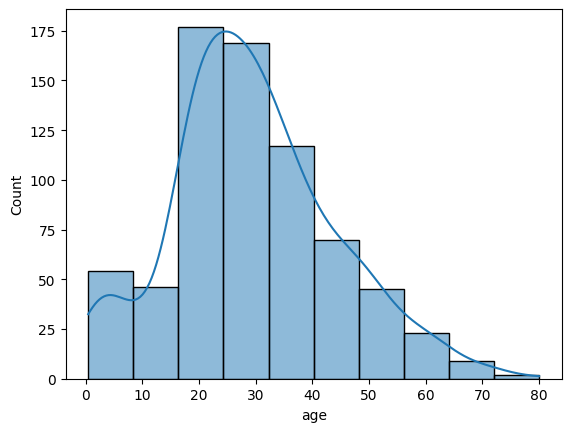

In [60]:
sns.histplot(df["age"],bins=10,kde=True)

In [61]:
#  Fill missing values in 'age' with the median because its skewed data
df['age'].fillna(df['age'].median(), inplace=True)

<ipython-input-61-6354d2c71235>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [62]:
df["embarked"].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [63]:
df["embark_town"].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [64]:
# df["embarked"],df["embark_town"] this both column is same no difference in it  so droping the column embarked town?

df.drop('embark_town',axis=1,inplace=True)

# droping alive column because its same as the survived
df.drop("alive",axis=1,inplace=True)

In [65]:
df.shape

(889, 12)

In [66]:
# cheking  if in this dataset exists duplicates or not
df.drop_duplicates()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,True


**There is duplicates in it because before removing duplicates shape=( 891 × 14), after removing duplicates the shape=(773,14)**
- And droped Alive column because its and survived is same column,also embark and embark_town and droped high number missing values column deck

## **3.Descriptive statistics**

In [67]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **4.visualization**

In [68]:
df.nunique()

,0
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,247
embarked,3
class,3
who,3


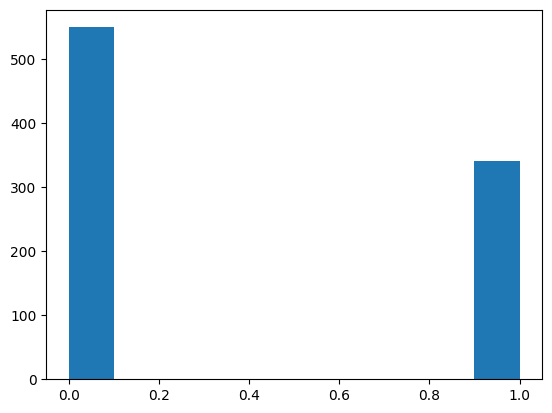

In [69]:

plt.hist(df["survived"])
plt.show()

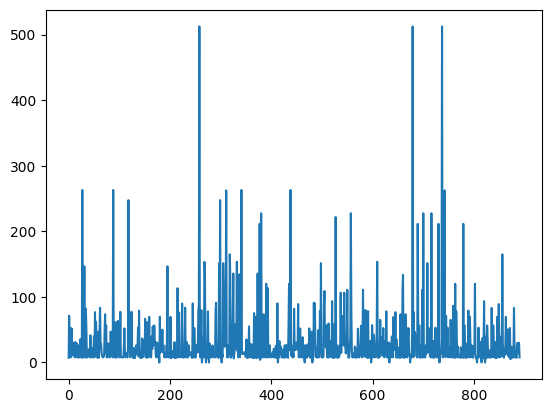

In [70]:
plt.plot(df["fare"])
plt.show()

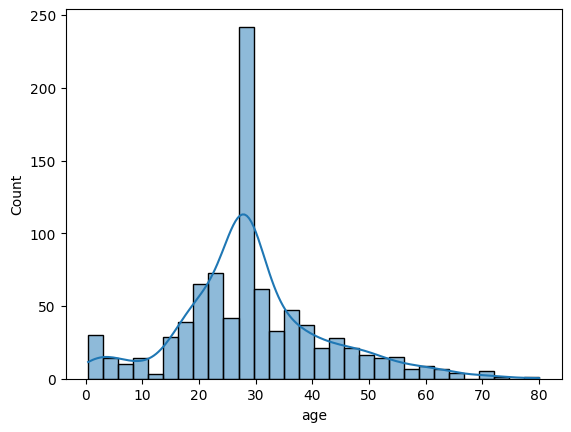

In [71]:
sns.histplot(df['age'], kde=True)
plt.show()

## **5.Correaltion Analysis**

In [72]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,True


In [73]:
# Converting all the nominal datas to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['sex'] = labelencoder.fit_transform(df['sex'])
df['who'] = labelencoder.fit_transform(df['who'])
df['adult_male']=labelencoder.fit_transform(df['adult_male'])
df['alone']=labelencoder.fit_transform(df['alone'])
df['class'] = labelencoder.fit_transform(df['class'])
df['embarked']=labelencoder.fit_transform(df['embarked'])

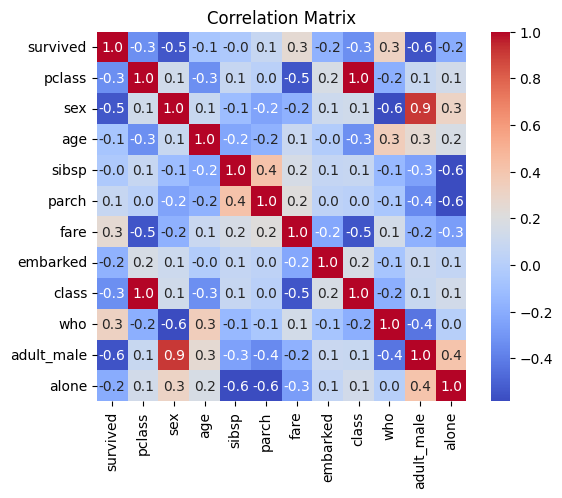

In [74]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlation matrix
#sns.heatmap(corr_matrix, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs))
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True) # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

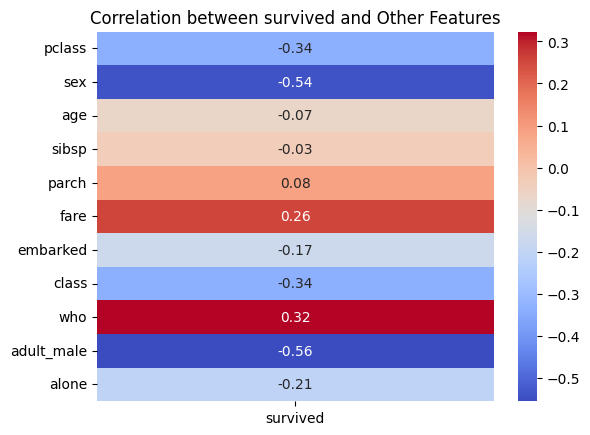

In [75]:


# Calculate the correlation between 'survived' and all other columns
price_corr = df.corr()['survived']

# Remove the correlation of 'survived'with itself (which is always 1)
price_corr = price_corr.drop('survived')

# Create a heatmap to visualize the correlations
sns.heatmap(price_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})  # to_frame() converts Series to DataFrame for heatmap
plt.title('Correlation between survived and Other Features')
plt.show()

In [76]:
# droping less correlated features
df.drop("age",axis=1,inplace=True)
df.drop("sibsp",axis=1,inplace=True)
df.drop("parch",axis=1,inplace=True)


**After droping less correlated features cheking again correlation for better understanding**

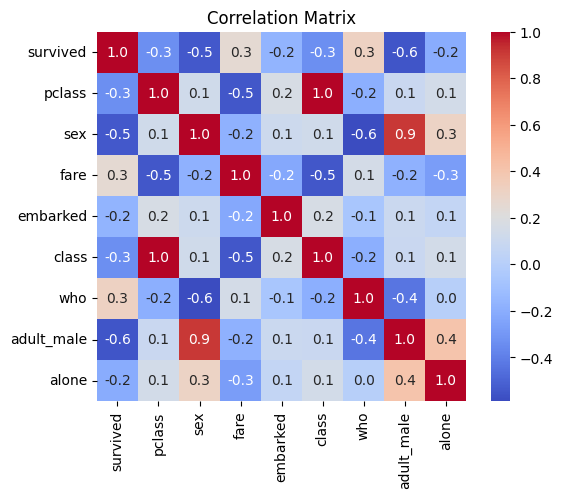

In [77]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlation matrix
#sns.heatmap(corr_matrix, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs))
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True) # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

In [78]:
# after this step i found  that the pclass and class  have same correaltion so droping pclass feature
df.drop("pclass",axis=1,inplace=True)


In [79]:
df

,survived,sex,fare,embarked,class,who,adult_male,alone
0,0,1,7.2500,2,2,1,1,0
1,1,0,71.2833,0,0,2,0,0
2,1,0,7.9250,2,2,2,0,1
3,1,0,53.1000,2,0,2,0,0
4,0,1,8.0500,2,2,1,1,1
...,...,...,...,...,...,...,...,...
886,0,1,13.0000,2,1,1,1,1
887,1,0,30.0000,2,0,2,0,1
888,0,0,23.4500,2,2,2,0,0
889,1,1,30.0000,0,0,1,1,1


# droped less correlated features(age,sibsp,parch) and same correlation features(pclass)

## **skewness and log**

### **Sex**

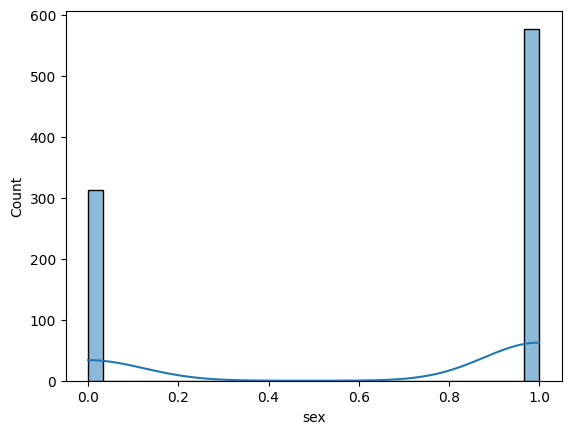

In [80]:
sns.histplot(df["sex"],bins=30,kde=True)
plt.show()

In [81]:
# sex column has skewness so logaritham using
df["sex"]=np.log1p(df["sex"])

### **fare**

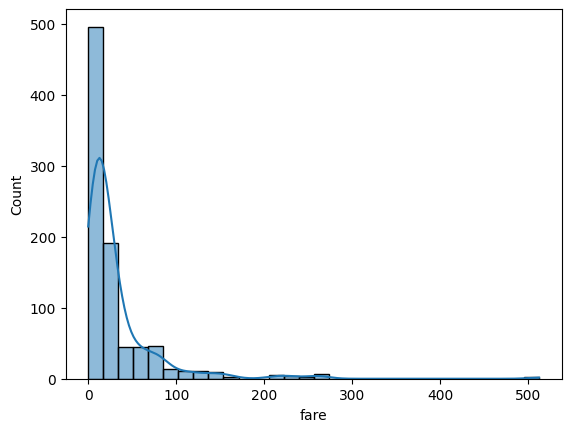

In [82]:
sns.histplot(df['fare'],bins=30,kde=True)
plt.show()

In [83]:
# fare column has skewness so log aplying
df["fare"]=np.log1p(df["fare"])

### **embarked**

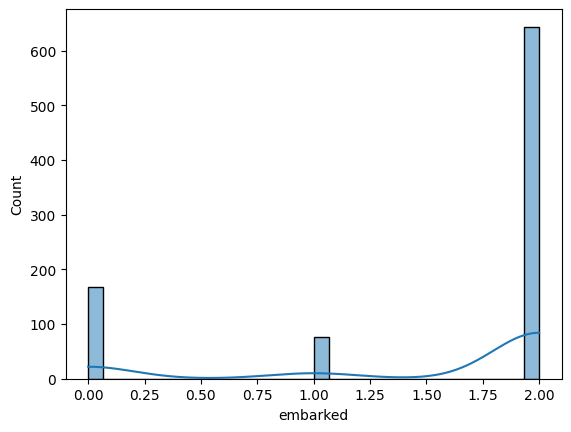

In [84]:
sns.histplot(df["embarked"],bins=30,kde=True)
plt.show()

In [85]:
# embarked column has skewness so log aplying
df["embarked"]=np.log1p(df["embarked"])

### **class**

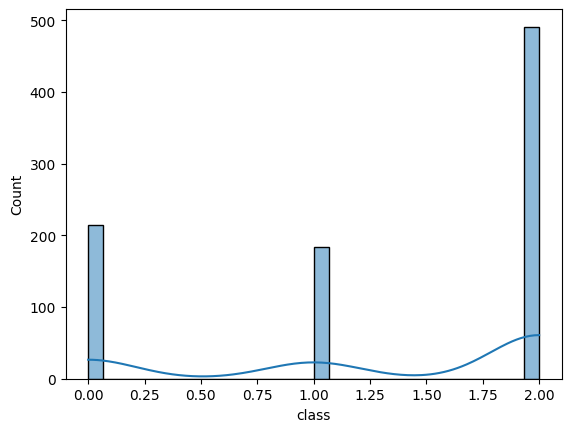

In [86]:
sns.histplot(df["class"],bins=30,kde=True)
plt.show()

In [87]:
# class column has skewness so log aplying
df["class"]=np.log1p(df["class"])

### **who**

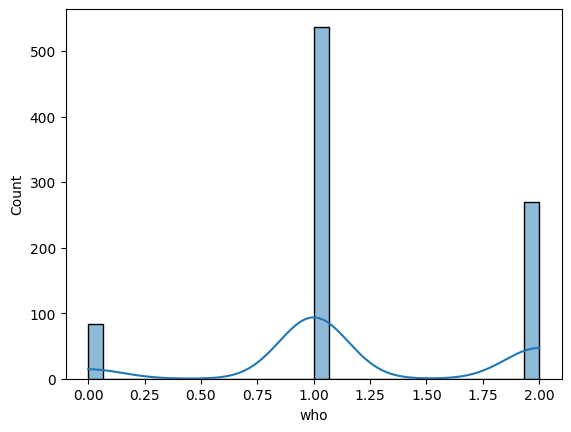

In [88]:
sns.histplot(df["who"],bins=30,kde=True)
plt.show()

In [89]:
# who column has skewness so log aplying
df["who"]=np.log1p(df["who"])

### **adult_male**

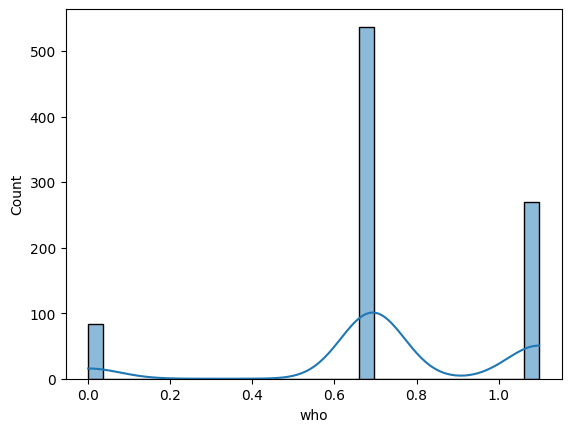

In [90]:
sns.histplot(df["who"],bins=30,kde=True)
plt.show()

In [91]:
# who column has skewness so log aplying
df["who"]=np.log1p(df["who"])

### **alone**

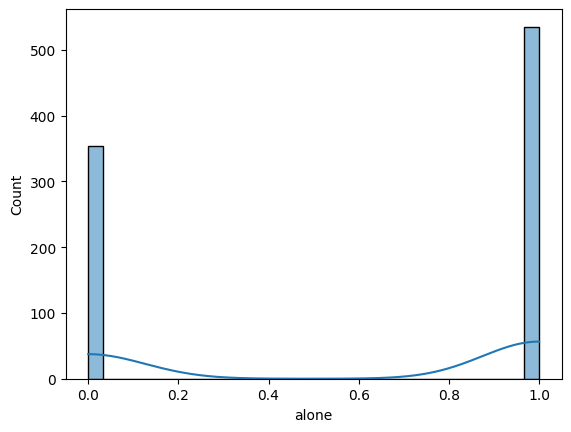

In [92]:
sns.histplot(df["alone"],bins=30,kde=True)
plt.show()

In [93]:
# alone column has skewness so log aplying
df["alone"]=np.log1p(df["alone"])

## **6.Outlier cheking and removing**

In [94]:
df.shape

(889, 8)

<Axes: >

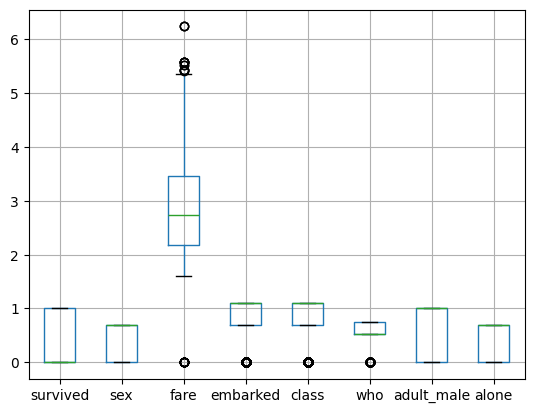

In [95]:
df.boxplot()

In [96]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='price')
df=df_cleaned

In [97]:
# creating some copys
df1=df
df2=df
df3=df

In [98]:
df

,survived,sex,fare,embarked,class,who,adult_male,alone
0,0,0.693147,2.110213,1.098612,1.098612,0.526589,1,0.000000
2,1,0.000000,2.188856,1.098612,1.098612,0.741276,0,0.693147
4,0,0.693147,2.202765,1.098612,1.098612,0.526589,1,0.693147
5,0,0.693147,2.246893,0.693147,1.098612,0.526589,1,0.693147
8,1,0.000000,2.495954,1.098612,1.098612,0.741276,0,0.000000
...,...,...,...,...,...,...,...,...
884,0,0.693147,2.085672,1.098612,1.098612,0.526589,1,0.693147
885,0,0.000000,3.405355,0.693147,1.098612,0.741276,0,0.000000
886,0,0.693147,2.639057,1.098612,0.693147,0.526589,1,0.693147
888,0,0.000000,3.196630,1.098612,1.098612,0.741276,0,0.000000


# There is outliers in it because before outlier removing the shape of the data is (889,8) after (523,8)

## **Predicting non scaled data**

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df[['sex', 'fare', 'embarked',"class","who","adult_male","alone"]]
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')


Baseline model accuracy: 0.75


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df[['sex', 'fare', 'embarked', 'class', 'who', 'adult_male', 'alone']]
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.2f}')

Logistic Regression accuracy: 0.75
Decision Tree accuracy: 0.82
Random Forest accuracy: 0.82
SVM accuracy: 0.75
KNN accuracy: 0.85


# predicted  non scaled data with all models and there is KNN have high accuracy

# 8.Diamonsionality reduction

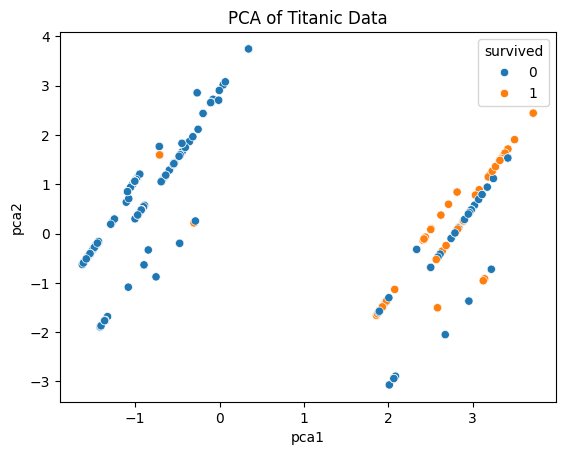

In [108]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['sex', 'fare', 'embarked',"class","who","adult_male","alone"]
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='survived', data=df)
plt.title('PCA of Titanic Data')
plt.show()



In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df[['pca1',"pca2"]]
y = df['survived']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.2f}')

Logistic Regression accuracy: 0.75
Decision Tree accuracy: 0.84
Random Forest accuracy: 0.82
SVM accuracy: 0.75
KNN accuracy: 0.83


# comparing to non scaled data pca scaled data has less accuracy  so skipping to another step

# 9.Data scaling

## Minmax scalr()

In [103]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Select the features that you want to scale
features = ['sex', 'fare', 'embarked',"class","who","adult_male","alone"]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df[features])


In [104]:
from sklearn.model_selection import train_test_split
X = df[['sex', 'fare', 'embarked',"class","who","adult_male","alone"]]  # Features
y = df['survived']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Train a baseline logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.78


In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df[['sex', 'fare', 'embarked',"class","who","adult_male","alone"]]  # Features
y = df['survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.2f}')

Logistic Regression accuracy: 0.75
Decision Tree accuracy: 0.82
Random Forest accuracy: 0.82
SVM accuracy: 0.75
KNN accuracy: 0.85


# Minimax scaled data and non scaled data have same accuracy

# **10.Initial modeling and Hypothesis testing**

## another models

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# Define features and target variable
X = df[['sex', 'fare', 'embarked', 'class', 'who', 'adult_male', 'alone']]
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.2f}')

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Logistic Regression accuracy: 0.75
Confusion Matrix:
[[61 22]
 [ 4 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82        83
           1       0.45      0.82      0.58        22

    accuracy                           0.75       105
   macro avg       0.69      0.78      0.70       105
weighted avg       0.84      0.75      0.77       105

------------------------------
Decision Tree accuracy: 0.82
Confusion Matrix:
[[70 13]
 [ 6 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        83
           1       0.55      0.73      0.63        22

    accuracy                           0.82       105
   macro avg       0.74      0.79      0.75       105
weighted avg       0.84      0.82      0.83       105

------------------------------
Random Forest accuracy: 0.79
Confusion Matrix:
[[67 16]
 [ 6 16]]

Classification Report:
        

# 11.Docummentation and reporting

Baseline model accuracy: 0.85
Confusion Matrix:
[[72 11]
 [ 5 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        83
           1       0.61      0.77      0.68        22

    accuracy                           0.85       105
   macro avg       0.77      0.82      0.79       105
weighted avg       0.87      0.85      0.85       105

------------------------------


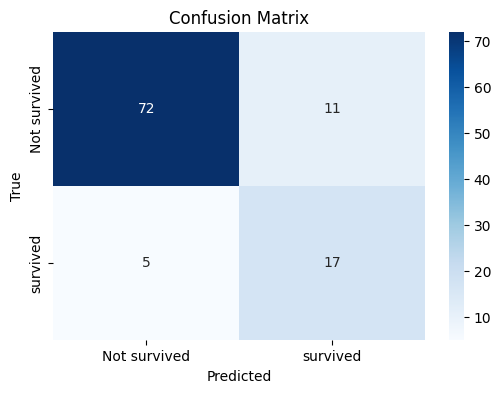

EDA Summary:
Dataset Shape: (523, 10)
Missing Values: 0
Correlation with survived: survived      1.000000
who           0.567989
pca1          0.548009
fare          0.123507
alone        -0.095096
embarked     -0.115516
pca2         -0.119849
class        -0.220507
adult_male   -0.567989
sex          -0.567989
Name: survived, dtype: float64


In [116]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


# Define features and target variable
X = df[['sex', 'fare', 'embarked',"class","who","adult_male","alone"]]
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("-" * 30)


# heatmap visualisation
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not survived','survived'],
            yticklabels=['Not survived','survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with survived': df.corr()['survived'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")


# Report

**Based on the analysis of Titanic dataset for predicting the survive , the KNeighborsClassifier  model demonstrated the best perfomance on non scaled data.**

 Based on the evaluation of the classification models for predicting survived or not , the KNeighborsClassifier  model with learning rate of 0.2 and random state set to 42 emerged as the best-performing  model. it achived the highest accuracy and   precision    recall  f1-score   support  results.  

,   Best model is that the minmax scaled and non scaled  models have better prediction and highest accuracy  precision    recall  f1-score   support.



### just defnition of accuracy precision recall f1 score


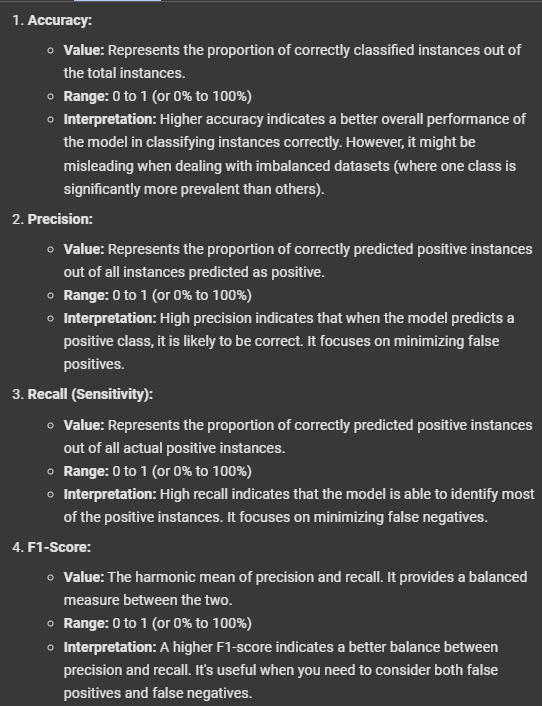

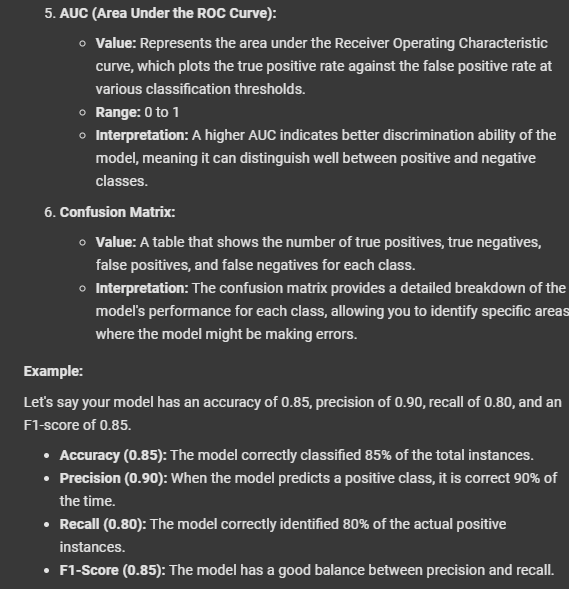

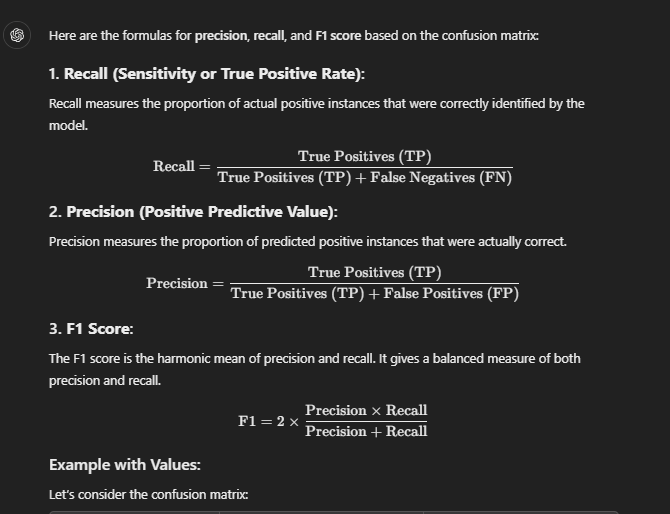

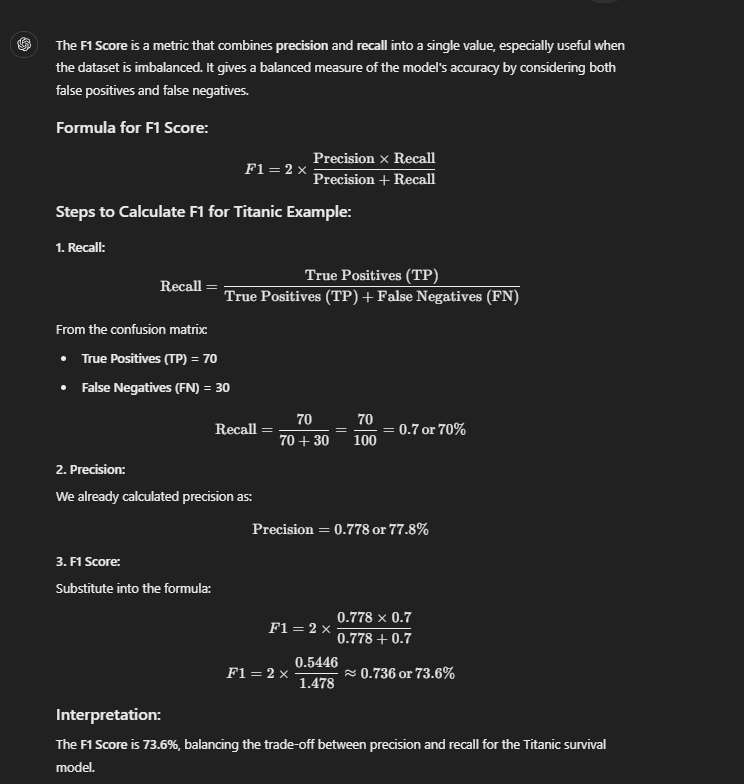